In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
startup_dataframe = pd.read_csv('50_Startups.csv')
startup_dataframe.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


EDA

In [3]:
startup_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


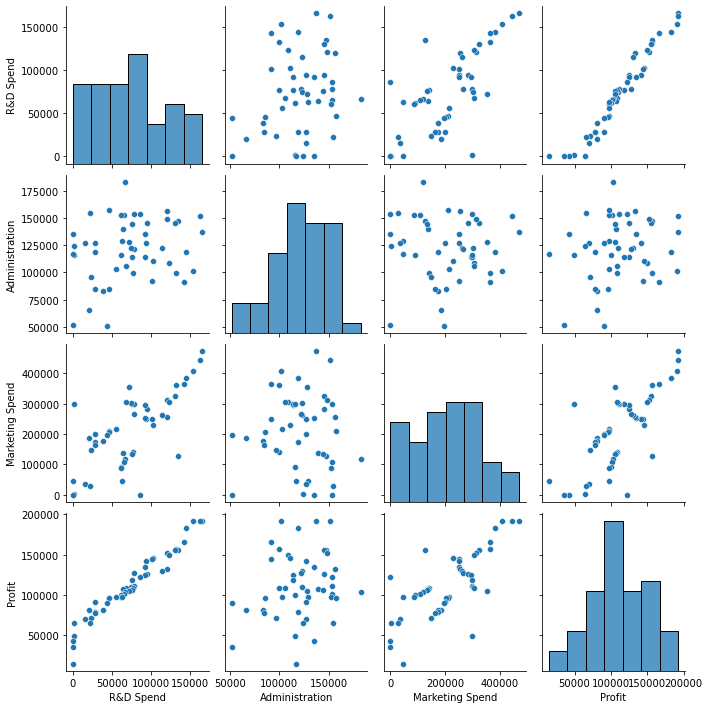

In [4]:
sns.pairplot(startup_dataframe)

<AxesSubplot:xlabel='R&D Spend'>

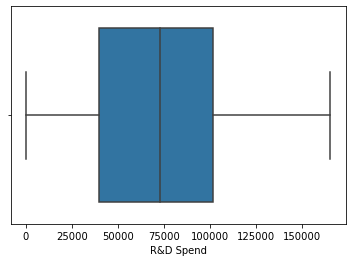

In [5]:
# Checking outliers

sns.boxplot(x='R&D Spend',data=startup_dataframe)

<AxesSubplot:xlabel='Administration'>

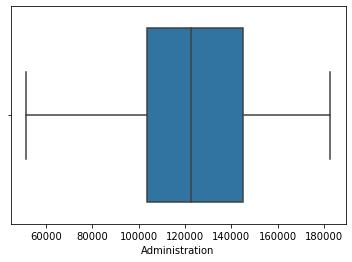

In [6]:
sns.boxplot(x='Administration',data=startup_dataframe)

<AxesSubplot:xlabel='Marketing Spend'>

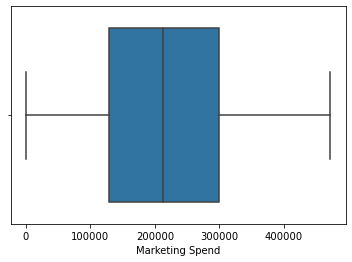

In [7]:
sns.boxplot(x='Marketing Spend',data=startup_dataframe)

<AxesSubplot:xlabel='State', ylabel='Profit'>

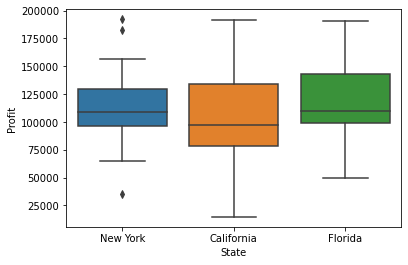

In [8]:
sns.boxplot(x='State',y='Profit',data=startup_dataframe)

o:\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


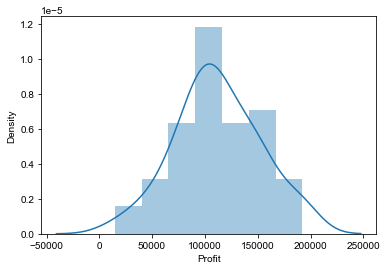

In [9]:
sns.distplot(startup_dataframe['Profit'])
sns.set_style('darkgrid')

In [10]:
# checking Null values
startup_dataframe.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [11]:
startup_dataframe['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [12]:
# dum = pd.get_dummies(data=startup_dataframe['State'],prefix='State')
# startup_dataframe= pd.concat([startup_dataframe,dum],axis=1)
# Lets removedd

In [13]:
startup_dataframe.drop('State',axis=1,inplace=True)
startup_dataframe.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [14]:
startup_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


<AxesSubplot:>

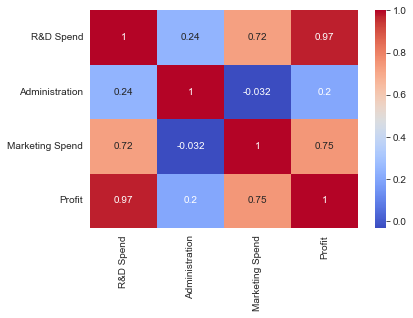

In [15]:
# Check the correlation and multicollinearity

sns.heatmap(startup_dataframe.corr(),annot=True,cmap='coolwarm')

In [16]:
# startup_dataframe= startup_dataframe.reindex(columns=['R&D Spend', 'Administration', 'Marketing Spend',
#        'State_California', 'State_Florida', 'State_New York','Profit'])

In [17]:
x_features=startup_dataframe.iloc[:,:3]
y_features= startup_dataframe['Profit']
x_features


,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42
5,131876.90,99814.71,362861.36
6,134615.46,147198.87,127716.82
7,130298.13,145530.06,323876.68
8,120542.52,148718.95,311613.29
9,123334.88,108679.17,304981.62


In [18]:
# checking the multicolinearity
#VIF equal to 1 = variables are not correlated
# VIF greater than 5 = variables are highly correlated.#The higher the VIF, the higher the possibility that multicollinearity exists, and further research is required.#When VIF is higher than 10, there is significant multicollinearity that needs to be corrected.

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Variance_values'] = [variance_inflation_factor(x_features,i) for i in range(x_features.shape[1])]
vif['Features']= x_features.columns
vif

,Variance_values,Features
0,8.384571,R&D Spend
1,4.026406,Administration
2,7.593984,Marketing Spend


In [19]:
# Now split the data x,y, x',y' 

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x_features,y_features,test_size=0.2,random_state=123)

print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)


(40, 3) (10, 3) (40,) (10,)


In [20]:
# Building LinearRegression model 

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(xtest,ytest)

LinearRegression()

In [21]:
lm.coef_, lm.intercept_

(array([ 0.89921382, -0.13298408, -0.00278915]), 65593.46848282998)

In [22]:
coef_lm = pd.DataFrame(lm.coef_,xtrain.columns,columns=['coef'])
coef_lm

,coef
R&D Spend,0.899214
Administration,-0.132984
Marketing Spend,-0.002789


Predict the model using test dataset


In [23]:
ypred= lm.predict(xtest)
ypred

array([141888.6992372 , 129590.89044868, 105707.13445203,  50545.94046866,
       132089.44497841, 194756.65131782,  75203.06984111, 132368.62752856,
       103937.17095493, 153340.5807726 ])

In [24]:
lm.score(xtrain,ytrain)

0.9255767258231659

In [25]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

reg_model =smf.OLS(endog=ytrain,exog=xtrain).fit()


In [26]:
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Profit   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                              847.3
Date:                Fri, 05 Aug 2022   Prob (F-statistic):                    3.91e-34
Time:                        08:37:07   Log-Likelihood:                         -438.51
No. Observations:                  40   AIC:                                      883.0
Df Residuals:                      37   BIC:                                      888.1
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
R&D Spend           0.6724      0.080      8.368      0.000       0.510       0.835
Administration      0.3273      0.035      9.232      0.000       0.255       0.399
Marketing Spend     0.0991      0.027      3.705      0.001       0.045       0.153
==============================================================================
Omnibus:                        1.222   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.543   Jarque-Bera (JB):                1.163
Skew:                          -0.278   Prob(JB):                        0.559
Kurtosis:                       2.378   Cond. No.                         9.95
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:

from sklearn import metrics
# MAP is [0,100%], lower the error better the result
print('MAPE',metrics.mean_absolute_percentage_error(ytest,ypred)*100)

MAPE 3.594275827274407


o:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Profit'>

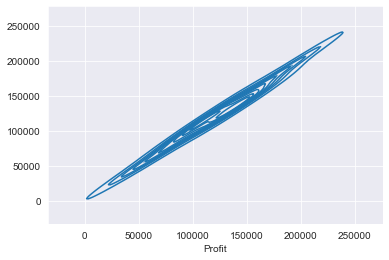

In [28]:
sns.kdeplot(ytest,ypred)

o:\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Profit', ylabel='Density'>

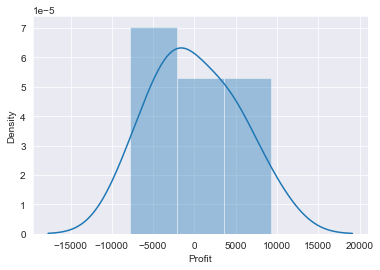

In [29]:
sns.distplot(ytest-ypred)